In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_12540\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[3084]

Unnamed: 0                         3084.000000
EPIC ID                       220169574.000000
Teff                               3324.119000
logg                                  4.947700
Flare #                               4.000000
Observation time                     78.682586
Average flare duration                0.332014
Longest flare duration                0.878561
Shortest flare duration               0.102158
Average percentage increase          84.480593
Highest percentage increase         311.628103
Lowest percentage increase            8.050215
Name: 3084, dtype: float64

In [4]:
flc = from_mast("220169574", mode="LC", mission="K2")

9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

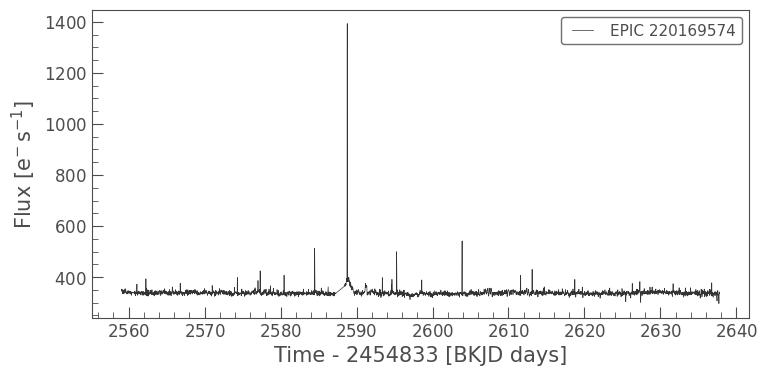

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

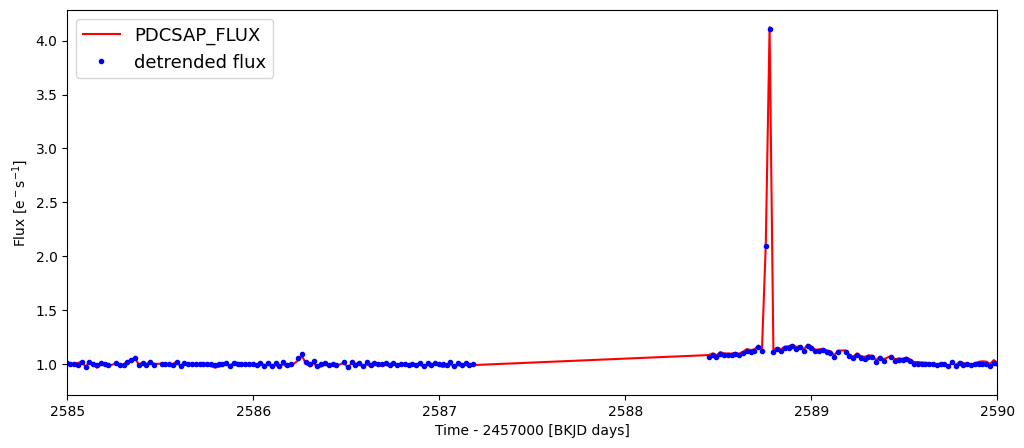

In [13]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(2585, 2590)
#plt.ylim(0,25)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,1282,1324,121346,121389,2588.470003,2589.348564,15326.292335618296,56.88411050094298,3.116281032562256,0.878561,3490.000000
1,1408,1419,121477,121489,2591.146549,2591.391728,1518.4329887818467,73.3816190459875,0.10109567642211914,0.245180,3490.000000
2,2173,2177,122276,122281,2607.471372,2607.573529,604.1802052079103,52.85613620449615,0.08050215244293213,0.102158,3490.000000
3,2182,2187,122286,122291,2607.675687,2607.777845,611.8211017453488,46.40110163872957,0.0813448429107666,0.102158,3490.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,69) gap.
Found 0 candidate(s) in the (69,1281) gap.
Found 4 candidate(s) in the (1281,2428) gap.
Found 0 candidate(s) in the (2428,2517) gap.
Found 0 candidate(s) in the (2517,2577) gap.
Found 0 candidate(s) in the (2577,2948) gap.
Found 0 candidate(s) in the (2948,3490) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
